For `CLT Demonstration`, we'll be using a dataset containing information about NBA players.

First, you'll be seeing how the population mean and the population standard deviation are related to those of the sampling distribution generated.

In [4]:
# Packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
np.random.seed(42)

In [7]:
# Population
df = pd.read_excel('nba_ht_wt.xls')
df.head()

,Player,Pos,Height,Weight,Age,School,BDate
0,Vitor Faverani,C,83,260,25,None,1988-05-05
1,Avery Bradley,G,74,180,22,Texas,1990-11-26
2,Keith Bogans,G,77,215,33,Kentucky,1980-05-12
3,Jared Sullinger,F,81,260,21,Ohio State,1992-03-04
4,Jeff Green,F,81,235,27,Georgetown,1986-08-28


In [8]:
df.shape

(505, 7)

In [9]:
df = df[['Weight']]
df.head()

,Weight
0,260
1,180
2,215
3,260
4,235


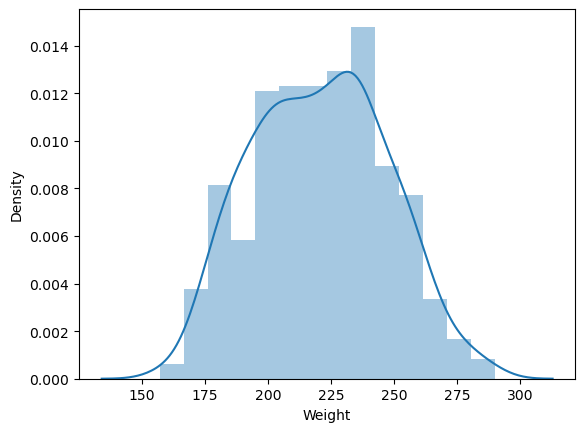

In [10]:
sns.distplot(df.Weight)
plt.show()

In [11]:
df.Weight.mean()

220.67326732673268

This is the true mean weight of the population. This is the population parameter, the ground truth.  

Let's take a random sample from this data, and see what mean we get.

In [12]:
samp_size = 30

In [13]:
df.Weight.sample(samp_size).mean()

222.1

Quite different from the population mean, right?  
Let's take another sample.

In [14]:
df.Weight.sample(samp_size).mean()

220.5

And another.

In [15]:
df.Weight.sample(samp_size).mean()

221.6

Each time we take a sample, our mean value is different. There is variability in the sample mean itself. Does the sample mean itself follow a distribution? Let's assess this.   
We'll take many samples from the data, and plot a histogram of the same.

In [16]:
sample_means = [df.Weight.sample(40).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

In [17]:
len(sample_means)

1000

Plotting the density for the sample means.

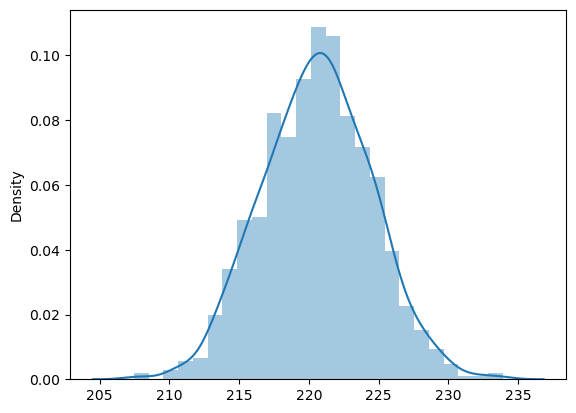

In [18]:
sns.distplot(sample_means)
plt.show()

Which distribution does this look like?

In [19]:
sample_means.mean()

220.59207499999962

In [20]:
sample_means.std()

3.9020744809177614

Population std vs. std of sampling mean

In [21]:
df.Weight.std()/np.sqrt(samp_size)

4.864344202231697

Let's make sure we got this right.
 - What happened here?
 - What is a sampling distribution
 - What is expected to follow a normal distribution?

the sampling distribution possesses 2 interesting properties that are related to the population parameters. Specifically, you verified that

Sampling distribution’s mean $(μ¯X)$ = Population mean (μ),

Sampling distribution’s standard deviation (standard error) = 
$σ
√
n$

For the above example, we computed the mean weight of all the basketball players that were available in the dataset. This value came out to be 220.67. In the context of this experiment, this value is our population mean.

 

Now to verify the first property, you picked around 1000 random samples of size 30 from the entire dataset and then calculated the mean of each sample. You plotted the distribution of all these sample means. This is your sampling distribution.

 

When you computed the mean of this sampling distribution (or in other words, the mean of all the sample means that you had taken earlier) you observed that this value came out to be 220.69. As you can see this value is pretty close to the original population mean of 220.67.

You already saw that the sampling distribution was nearly a normal distribution. However, you may wonder that since the original distribution of the population was also normal, therefore this leads to the normal behaviour for the sampling distribution. In order to verify whether it is indeed true or not, take a look at the next example.

#### Claim: This phenomenon occurs, rather, this theorem holds regardless of the underying populations distribution.
That seems very far fetched. We'll need to see it to believe it.

In [23]:
df1 = pd.read_csv("exp_data.csv")

In [58]:
df1.head()

,VAL
0,362
1,361
2,360
3,359
4,358


In [24]:
df1.shape

(1112, 1)

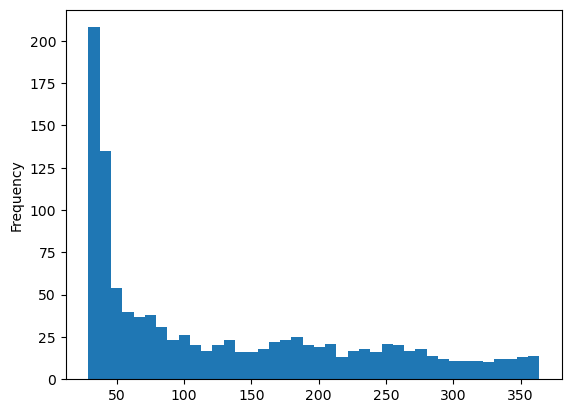

In [25]:
df1.VAL.plot.hist(bins=40)
plt.show()

Looks like an exponential distribution.

Let's pick samples from this distribution, record their means, and plot the sampling distribution.

In [26]:
samp_size = 50

In [27]:
sample_means = [df1.VAL.sample(samp_size).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

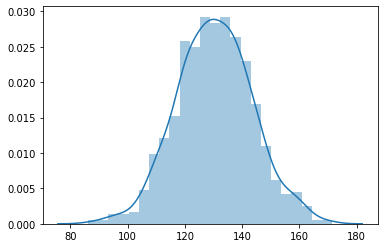

In [29]:
sns.distplot(sample_means)
plt.show()

In [28]:
sample_means.mean()

130.39213999999996

In [29]:
df1.VAL.mean()

130.4181654676259

In [30]:
sample_means.std()

13.263962580003142

In [31]:
df1.VAL.std()/np.sqrt(samp_size)

14.060457446377631

Thus, no matter the parent population distribution, when you take samples, compute their means and find the sampling distribution, it will always be normal, or at least nearly normal. This is one of the most important implications of the Central Limit Theorem.

### <font color = 'blue'>CLT Demonstration - II

There is only one more thing to consider now, which is the sample size. Here, we will observe that as the sample size increases, the underlying sampling distribution will approximate a normal distribution even more closely.

### Effect of sample size

In [32]:
sample_sizes = [3, 10, 30, 50, 100, 200]

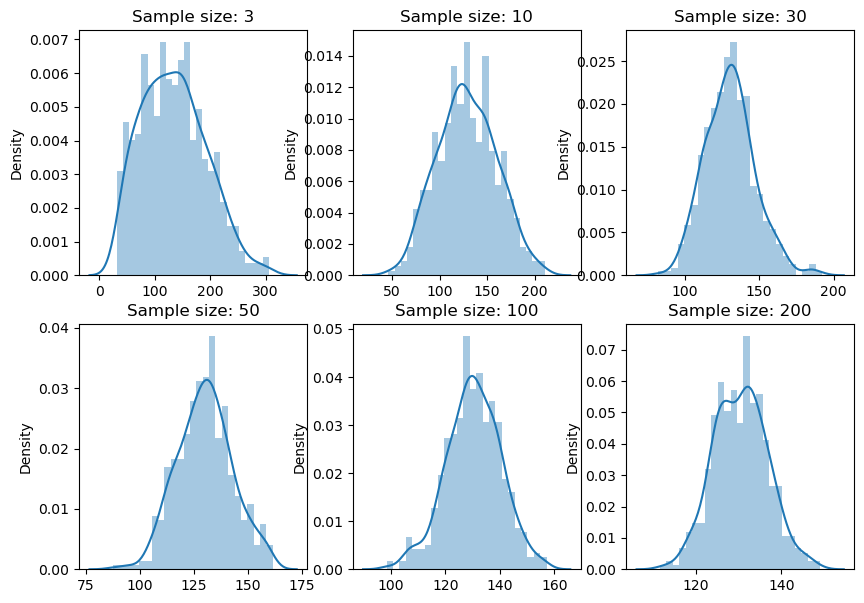

In [33]:
plt.figure(figsize=[10,7])
for ind, samp_size in enumerate(sample_sizes):
    sample_means = [df1.VAL.sample(samp_size).mean() for i in range(500)]
    plt.subplot(2,3,ind+1)
    sns.distplot(sample_means, bins=25)
    plt.title("Sample size: "+str(samp_size))
plt.show()

What is the significance of this, and why is it useful? Used in the industry?

Let's say we found the mean commute time of 30,000 employees of an office by taking a small sample of 100 employees and finding their mean commute time. This sample’s mean comes to $\bar{X}$ = 36.6 minutes and its standard deviation is S = 10 minutes.


We then said that this sample mean cannot be taken as the population mean, as there might be some errors in the sampling process. However, we can say that the population mean, i.e., the daily commute time of all 30,000 employees $\bar{X}$ = 36.6 (sample mean) +/- some margin of error.


Now, you may be thinking that you can use the standard error for the margin of error. However, keep in mind that although the standard error provides a good estimate of this margin of error, you cannot use it in place of the margin of error. To understand why and how you would find the margin of error in that case, let's move on to the next examples.

## <font color = 'Maroon'>Estimating Mean Using CLT
    
You can find the above margin of error using the CLT (central limit theorem). Now that you know the CLT, let’s see how you can find the margin of error.

Let’s say that you have a sample with sample size n, mean $\bar{X}$ and standard deviation S. Now, the y% confidence interval (i.e., the confidence interval corresponding to a y% confidence level) for $\mu$ would be given by the range:



At this point, it is important to address a common misconception. Sampling distributions are just a theoretical exercise; you’re not actually expected to make one in real life. If you want to estimate the population mean, you will just take a sample. You will not create an entire sampling distribution.

You must be wondering why you studied sampling distributions if this is the case. To understand the reason for this, let's go through the actual process of sampling. Recall that you are doing sampling because you want to find the population mean, albeit in the form of an interval. The three steps to follow are as follows:

1. First, take a sample of size n.

2. Then, find the mean $\bar{X}$ and standard deviation S of this sample.

3. Now, you can say that for a y% confidence level, the confidence interval for the population mean $\mu$ is given by $(\bar{X}-\frac{Z^{*}S}{\sqrt{n}}, \bar{X}+\frac{Z^{*}S}{\sqrt{n}})$.

However, as you have seen, you cannot finish step 3 without the CLT. The CLT lets you assume that the sample mean would be normally distributed, with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$ (approx. $\frac{S}{\sqrt{n}}$). Using this assumption, it is possible to find the margin of error, confidence interval, etc.


Thus, you learnt about sampling distributions so that you could learn more about the CLT and be able to make all the assumptions as stated above.

#### Real life Example to understand how confidence intervals can help us make decisions

Facebook wants to change it's UI and before launching to all the user it wants to test it first on few users. So it takes a sample of 10000 users and show them this new UI and takes feedback that they would use new one or old. Let's say 50.5% say vote for new UI. Now how does facebook know that this sample users were correct representation of population. Let’s find the 90% confidence interval (confidence interval for a 90% confidence level) for that case.

50.5% of the 10,000 people surveyed preferred feature B to feature A. So, if X = the proportion of people that prefer feature B to feature A, then, for this sample, $\bar{X}$ = 0.505 (50.5%) and n = 10,000. In addition to this, you've been told that the sample’s standard deviation S = 0.2(20%).

Also, you know that the actual population mean $\mu$ lies between $\bar{X}$ + margin of error. However, now it is vital for us to find this margin of error.

 

If this margin of error is, say, 1%, then that means that the population mean $\mu$, which is the proportion of people that prefer feature B to feature A, lies between the range (50.5 - 1)% to (50.5 + 1)%, i.e.,  49.5 % to 51.5%. This means that you cannot say with certainty that $\mu$ would be more than 50%. So, even though the proportion of people that prefer feature B to feature A is more than 50% in our sample, you would not be able to say with certainty that this proportion would be more than 50% for the entire population.

 

On the other hand, if the margin of error is, say, 0.3%, then you will be able to say that the population mean lies within (50.5 - 0.3)% and (50.5 + 0.3)%, i.e., 50.2% to 50.8%. So, you will be able to say with certainty that the proportion of people that prefer feature B to feature A is more than 50% in our sample and for the entire population too.

 

Now, the margin of error corresponding to a 90% confidence level would be given by $\frac{Z^{*}S}{\sqrt{n}}$ = $\frac{1.65*0.2}{\sqrt{10,000}}$ = 0.0033 (0.33%), and the population mean lies between 50.17% and 50.83%.


Hence, you can say that feature B should replace feature A with 90% confidence.